In [3]:
import pandas as pd
from utils import myutils_analysis
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [4]:
test_data = pd.read_csv("../data/gab_or_reddit_split/gab_test_int_label.csv")
train_data = pd.read_csv("../data/train_int_label.csv")
labels = pd.read_csv("../label_preds/label_pred_singleMLM_gab.csv")

In [5]:
category = 1
true_labels = test_data.label_vector
train_labels = train_data.label_vector
train_text = train_data.text
pred_labels = labels.prediction
text = test_data.text

In [6]:
# myutils_analysis.show_word_clouds_confusion_matrix(true_labels,pred_labels, text, category)

In [7]:
data_cleaned = myutils_analysis.get_data_cleaned(text)

In [8]:
# myutils_analysis.show_word_clouds_confusion_matrix(true_labels,pred_labels, data_cleaned, category)

In [9]:
#myutils_analysis.show_common_words_confusion_matrix(test_data.label_category, labels.prediction,data_cleaned,20, category)

In [10]:
#myutils_analysis.show_common_bigrams_confusion_matrix(test_data.label_category, labels.prediction,data_cleaned,20,category)

In [11]:
wrongly_classified = myutils_analysis.get_wrongly_classified(true_labels,pred_labels,0,text)
wrongly_classified

{1: 5, 2: 21, 3: 14, 4: 14, 5: 10, 6: 15, 7: 14, 8: 11, 9: 3, 10: 4, 11: 6}

category: 0


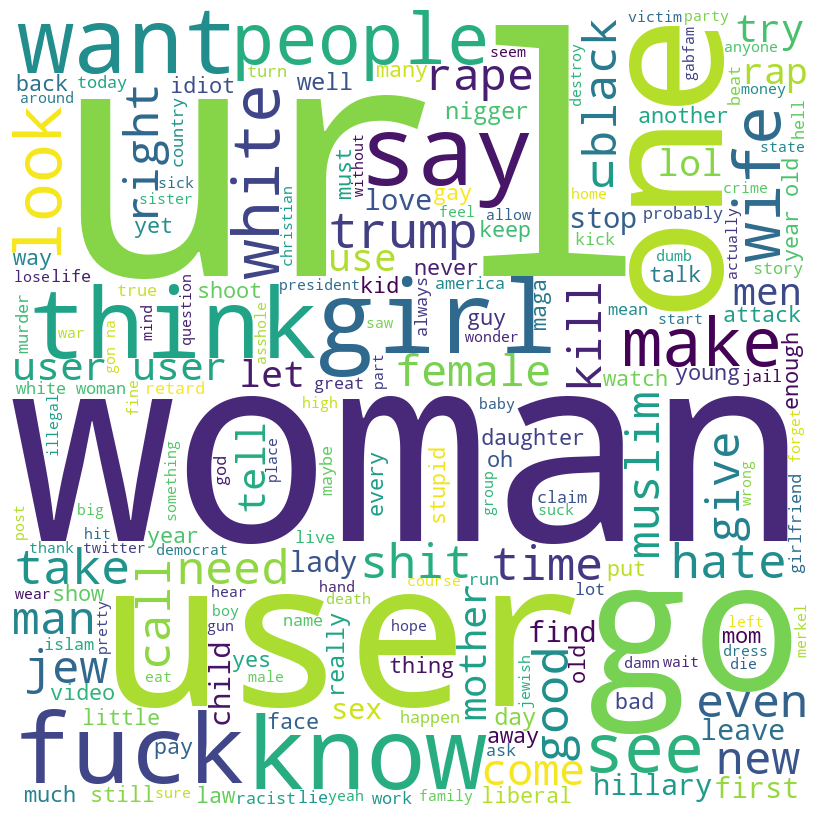

category: 1


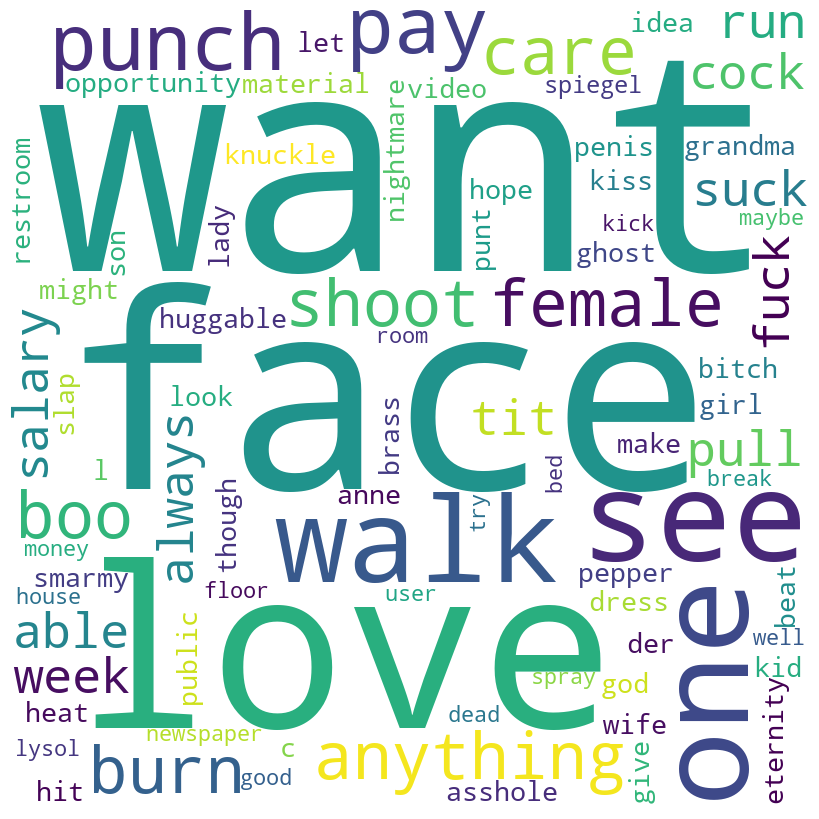

category: 2


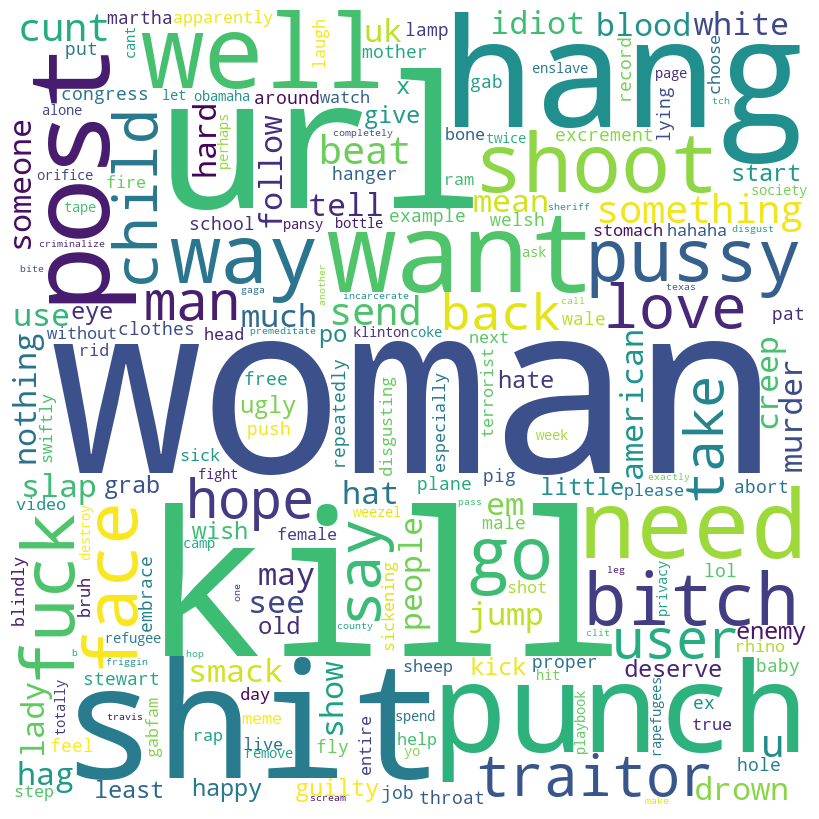

category: 3


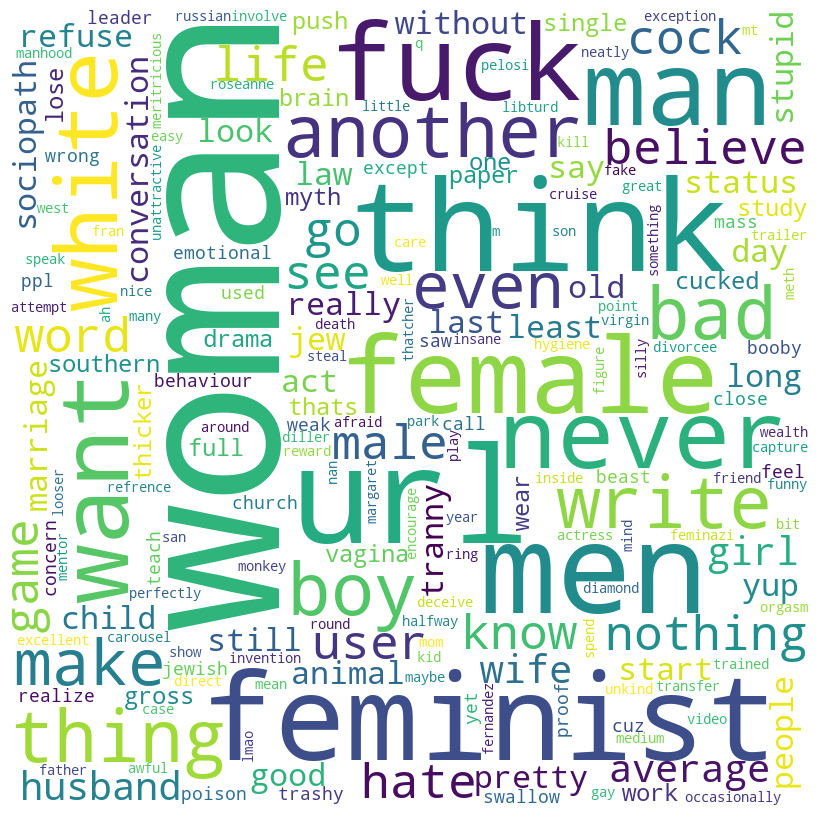

category: 4


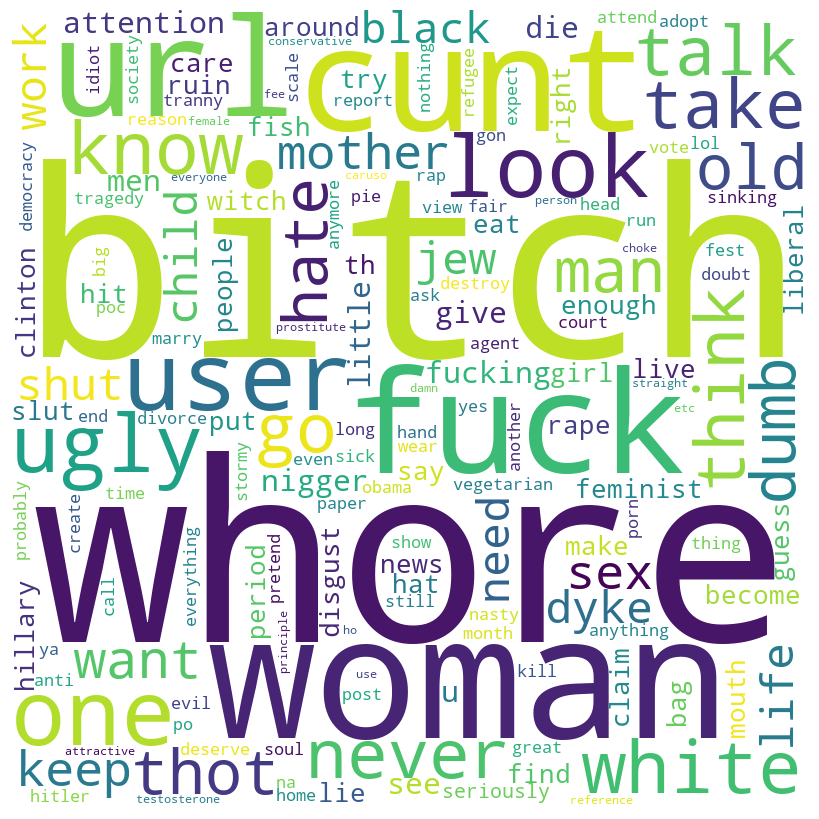

category: 5


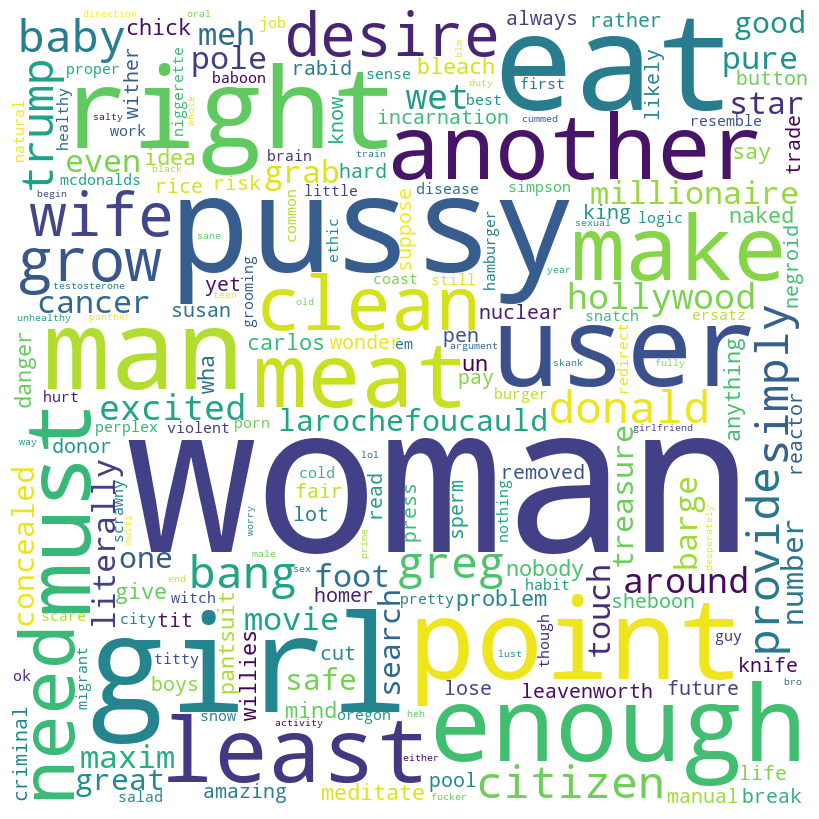

category: 6


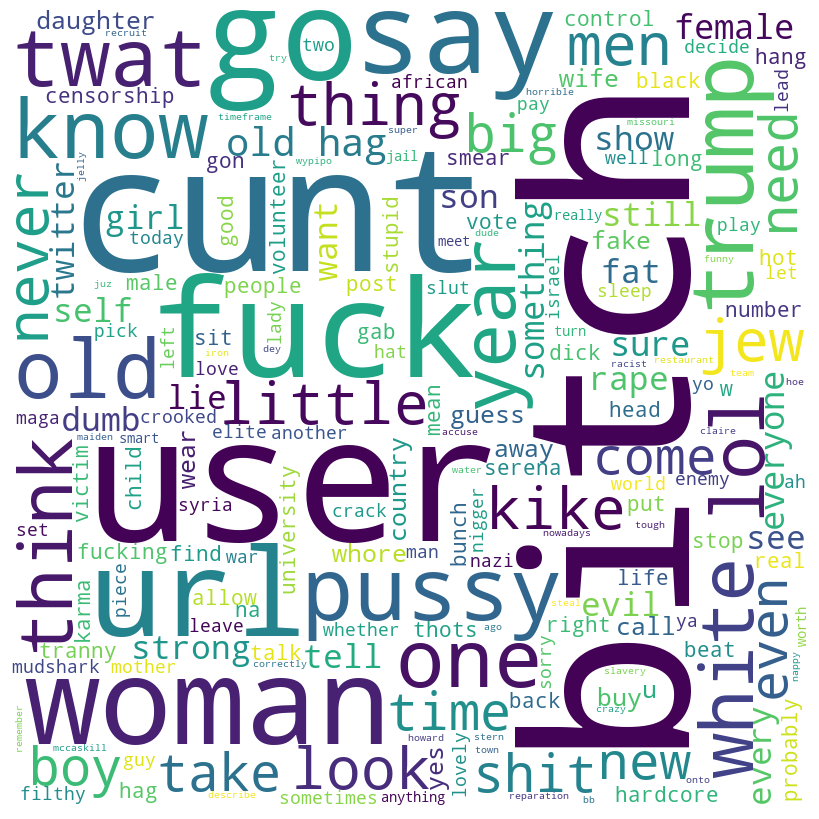

category: 7


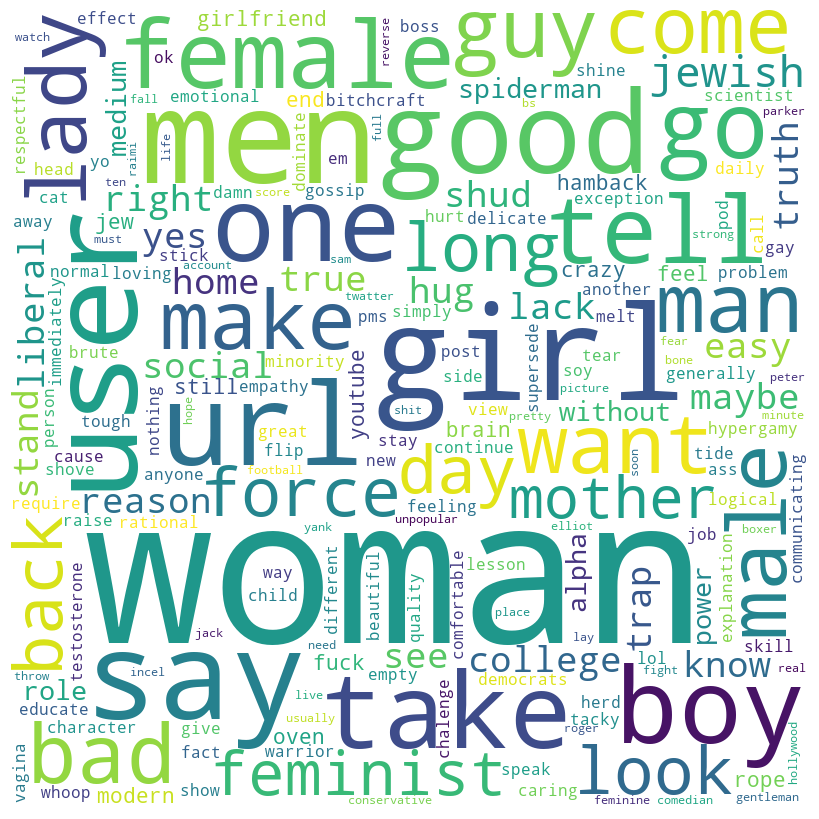

category: 8


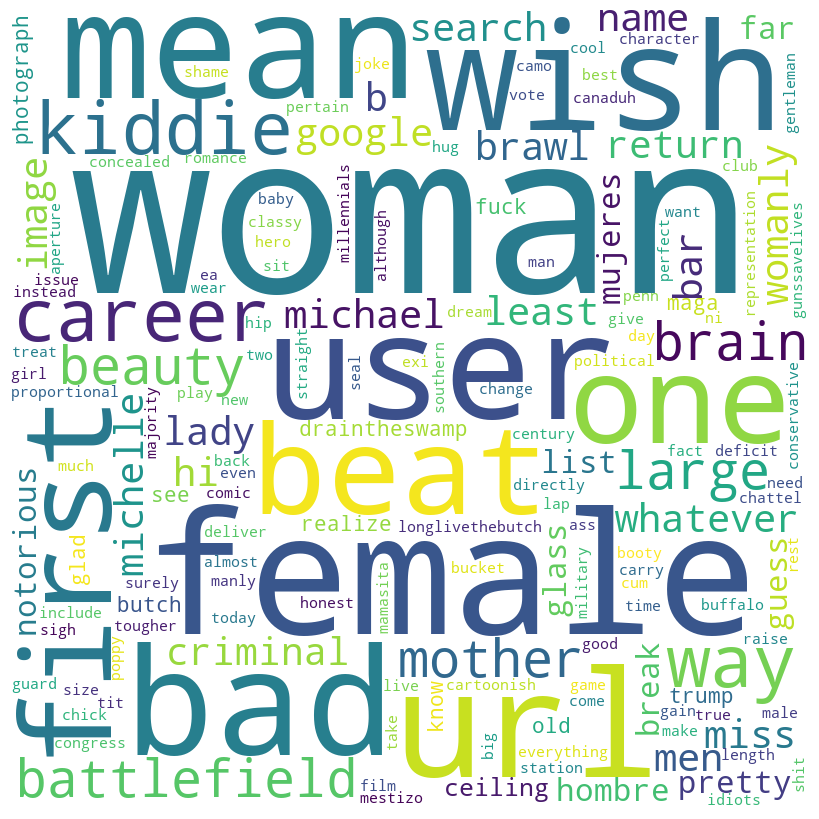

category: 9


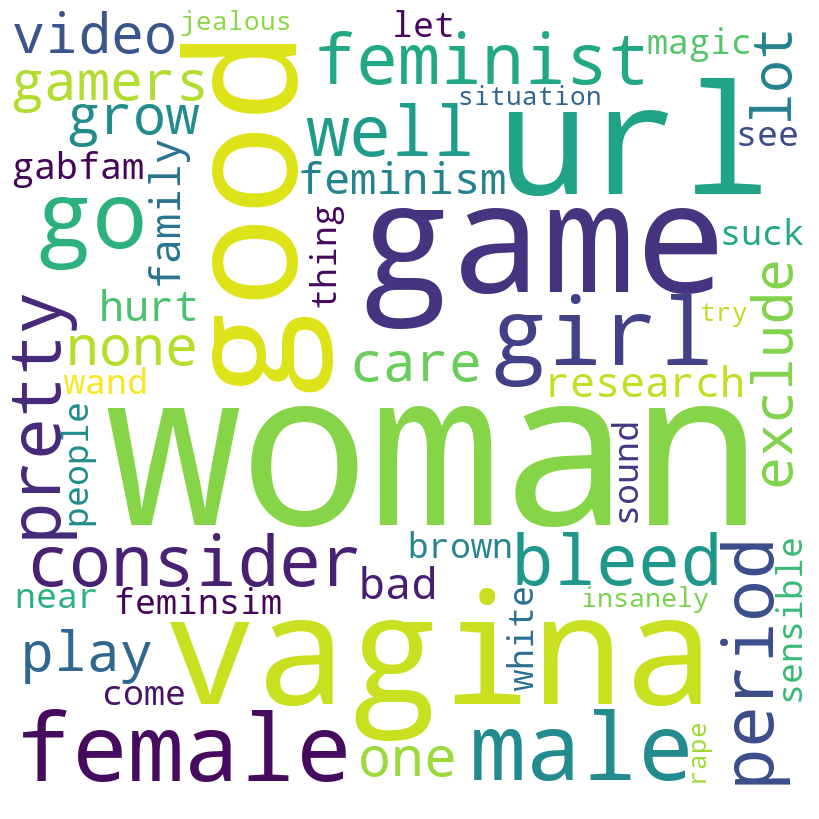

category: 10


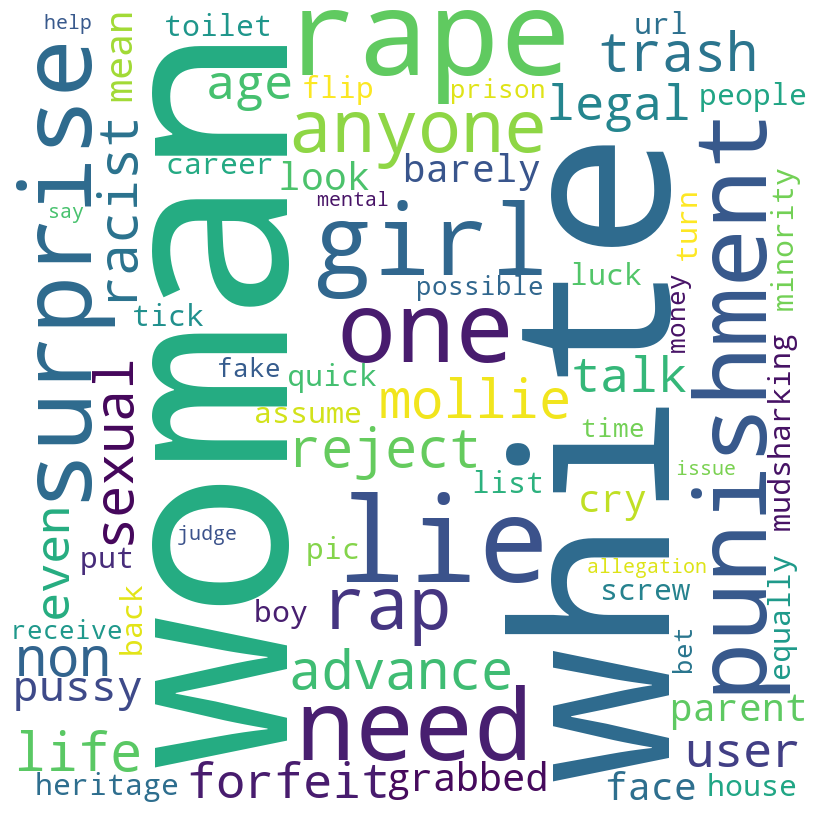

category: 11


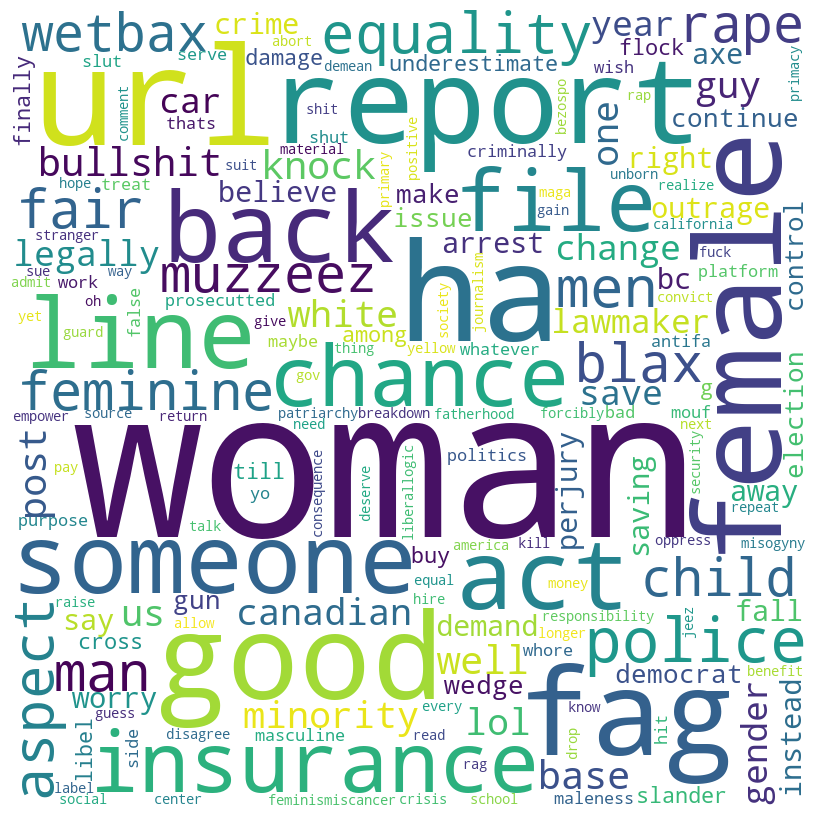

In [12]:
myutils_analysis.show_word_clouds_categories(true_labels, pred_labels,data_cleaned)

In [13]:
myutils_analysis.show_common_words_categories(true_labels, pred_labels, data_cleaned)

category: 0
In total there is 19604 words in the array
[('url', 396), ('woman', 283), ('user', 244), ('get', 174), ('like', 146), ('go', 120), ('girl', 114), ('white', 100), ('one', 94), ('know', 92), ('think', 86), ('say', 86), ('fuck', 85), ('want', 83), ('would', 82), ('people', 79), ('make', 79), ('trump', 74), ('see', 71), ('old', 70)]
category: 1
In total there is 106 words in the array
[('want', 4), ('face', 3), ('would', 2), ('love', 2), ('see', 2), ('one', 2), ('walk', 2), ('punch', 2), ('pay', 2), ('anything', 2), ('boo', 2), ('burn', 2), ('like', 2), ('shoot', 2), ('female', 2), ('care', 2), ('suck', 1), ('tit', 1), ('always', 1), ('could', 1)]
category: 2
In total there is 502 words in the array
[('woman', 9), ('get', 9), ('kill', 6), ('url', 5), ('shit', 5), ('hang', 5), ('punch', 5), ('want', 4), ('post', 4), ('would', 4), ('well', 4), ('need', 4), ('shoot', 4), ('way', 4), ('pussy', 3), ('do', 3), ('like', 3), ('bitch', 3), ('fuck', 3), ('go', 3)]
category: 3
In total th

In [14]:
myutils_analysis.show_common_bigrams_categories(true_labels, pred_labels, data_cleaned)

category: 0
In total there is 17984 bigrams in the array
[(('user', 'user'), 45), (('year', 'old'), 31), (('white', 'woman'), 22), (('look', 'like'), 20), (('gon', 'na'), 17), (('url', 'url'), 14), (('hold', 'vote'), 14), (('vote', 'hold'), 13), (('white', 'girl'), 12), (('old', 'girl'), 10), (('every', 'day'), 9), (('woman', 'url'), 9), (('piece', 'shit'), 8), (('mother', 'fucker'), 8), (('maga', 'trump'), 8), (('make', 'sure'), 8), (('sexually', 'assault'), 7), (('url', 'via'), 7), (('rape', 'woman'), 7), (('get', 'away'), 7)]
category: 1
In total there is 95 bigrams in the array
[(('would', 'love'), 1), (('love', 'suck'), 1), (('suck', 'tit'), 1), (('always', 'want'), 1), (('want', 'see'), 1), (('see', 'one'), 1), (('one', 'could'), 1), (('could', 'run'), 1), (('run', 'pull'), 1), (('pull', 'cock'), 1), (('cock', 'fuck'), 1), (('fuck', 'face'), 1), (('love', 'able'), 1), (('able', 'walk'), 1), (('walk', 'punch'), 1), (('punch', 'face'), 1), (('pay', 'week'), 1), (('week', 'salary'),

In [15]:
print(classification_report(true_labels,pred_labels, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1652
           1       0.27      0.30      0.29        10
           2       0.44      0.49      0.46        43
           3       0.42      0.45      0.44        42
           4       0.50      0.51      0.51        90
           5       0.21      0.22      0.22        18
           6       0.60      0.64      0.62        86
           7       0.31      0.38      0.34        29
           8       0.06      0.12      0.08         8
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         8
          11       0.33      0.29      0.31        17

    accuracy                           0.85      2007
   macro avg       0.34      0.36      0.35      2007
weighted avg       0.86      0.85      0.85      2007



In [16]:
true_labels_pretty_names = myutils_analysis.get_category_name(true_labels)
pred_labels_pretty_names = myutils_analysis.get_category_name(pred_labels)
set_true_labels = set(true_labels_pretty_names)

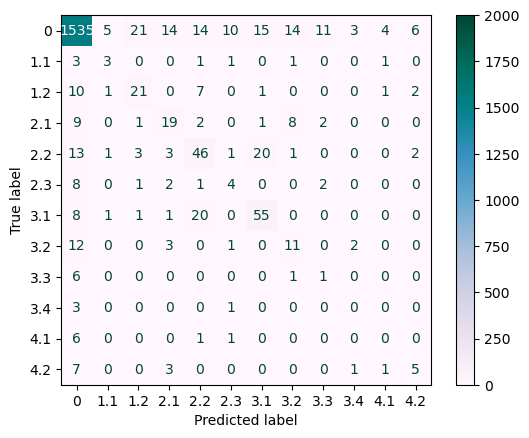

In [17]:
disp = ConfusionMatrixDisplay.from_predictions(true_labels_pretty_names, pred_labels_pretty_names, display_labels=sorted(set_true_labels),cmap='PuBuGn')
#disp.plot()
disp.ax_.get_images()[0].set_clim(0, 2000)
#plt.show()


In [18]:
pred_labels.value_counts().sort_index()

0     1620
1       11
2       48
3       45
4       92
5       19
6       92
7       36
8       16
9        6
10       7
11      15
Name: prediction, dtype: int64

In [19]:
def f1_score(true_labels, pred_labels):
    precision, recall, fbeta_score, support = precision_recall_fscore_support(true_labels, pred_labels,
                                                                             average='macro',
                                                                           zero_division=0.0)
    macro_f1 = (2 * precision * recall) / (precision + recall)
    print("macro f1: " + str(macro_f1))


In [20]:
f1_score(true_labels,pred_labels)

macro f1: 0.3509768754745371


In [21]:
true_labels_binary = myutils_analysis.set_to_one(true_labels)
pred_labels_binary = myutils_analysis.set_to_one(pred_labels)

In [22]:
true_labels_category = myutils_analysis.set_to_category(true_labels)
pred_labels_category = myutils_analysis.set_to_category(pred_labels)

In [23]:
print(classification_report(true_labels_binary, pred_labels_binary, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1652
           1       0.70      0.76      0.73       355

    accuracy                           0.90      2007
   macro avg       0.82      0.84      0.83      2007
weighted avg       0.90      0.90      0.90      2007



In [24]:
f1_score(true_labels_binary,pred_labels_binary)

macro f1: 0.8335876750538029


In [25]:
print(classification_report(true_labels_category, pred_labels_category, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1652
           1       0.42      0.47      0.45        53
           2       0.50      0.52      0.51       150
           3       0.47      0.55      0.51       127
           4       0.27      0.24      0.26        25

    accuracy                           0.85      2007
   macro avg       0.52      0.54      0.53      2007
weighted avg       0.86      0.85      0.86      2007



In [26]:
f1_score(true_labels_category,pred_labels_category)

macro f1: 0.5320777783098263


In [27]:
train_cleaned = myutils_analysis.get_data_cleaned(train_text)

In [28]:
#myutils_analysis.show_word_clouds_categories_true(train_labels,train_cleaned)

In [29]:
myutils_analysis.show_common_words_categories_true(train_labels,train_cleaned, 10)

category: 0
In total there is 126332 words in the array
[('woman', 2642), ('url', 1552), ('get', 1454), ('like', 1297), ('girl', 1198), ('fuck', 953), ('say', 913), ('go', 848), ('user', 810), ('want', 727)]
category: 1
In total there is 689 words in the array
[('woman', 16), ('get', 13), ('want', 11), ('like', 10), ('as', 10), ('would', 10), ('bitch', 7), ('shit', 7), ('give', 6), ('punch', 6)]
category: 2
In total there is 2824 words in the array
[('woman', 66), ('get', 32), ('bitch', 28), ('would', 24), ('fuck', 24), ('say', 22), ('need', 21), ('like', 21), ('make', 20), ('go', 19)]
category: 3
In total there is 9767 words in the array
[('woman', 612), ('men', 138), ('get', 121), ('like', 89), ('female', 87), ('fuck', 84), ('girl', 77), ('want', 72), ('know', 63), ('go', 63)]
category: 4
In total there is 8308 words in the array
[('woman', 222), ('bitch', 199), ('fuck', 117), ('whore', 108), ('get', 99), ('like', 97), ('cunt', 58), ('know', 55), ('say', 54), ('url', 49)]
category: 5

In [30]:
text.str.len().mean()

124.1818634778276